# ML HW6
### 106598018 萬俊瑋

**1. We mentioned that the parameters 𝛾 and 𝛽 in batch normalization are trained through backprop. Explain why we don’t want to directly compute these two parameters from the training samples and also give the details how the training is carried out.**  
>Beacause the mean and varence of data in each batch are different, so we need to train the 𝛾 and 𝛽 like training the weight, but not compute they from the all data set.  
And we can train the 𝛾 and 𝛽 in the same way which we train the weight in NN. We can compute the partial derivative of loss function for 𝛾 and 𝛽 and do the gradient decent.

**2. We use the “Reparameterization Trick” in training Variational AutoEncoder (VAE). Explain why this trick is necessary and how it is accomplished.**
>The reparameterization trick is as follows. Recall, if we have x∼N(μ,Σ) and then standardize it so that μ=0,Σ=1, we could revert it back to the original distribution by reverting the standardization process. Hence, we have this equation:x=μ+Σ1/2Xstd  
With that in mind, we could extend it. If we sample from a standard normal distribution, we could convert it to any Gaussian we want if we know the mean and the variance. Hence we could implement our sampling operation of 
z by:z=μ(X)+Σ1/2(X)ϵ where ϵ∼N(0,1).  
Now, during backpropagation, we don’t care anymore with the sampling process, as it is now outside of the network, i.e. doesn’t depend on anything in the net, hence the gradient won’t flow through it.  
However, we are now facing a problem. How do we get z from the encoder outputs? Obviously we could sample z from a Gaussian which parameters are the outputs of the encoder. Alas, sampling directly won’t do, if we want to train VAE with gradient descent as the sampling operation doesn’t have gradient!  
There is, however a trick called reparameterization trick, which makes the network differentiable. Reparameterization trick basically divert the non-differentiable operation out of the network, so that, even though we still involve a thing that is non-differentiable, at least it is out of the network, hence the network could still be trained.

**3. Use the equations of optimal margin (linear) SVM (in pp. 12) to find 𝐰 given 𝐱1 =[1 −1]𝑇 ∈𝐶+1 and 𝐱2 =[−1 −1]𝑇 ∈𝐶−1.**

**4. Implement a discrete HMM training program. Use the three-urn example (in pp.
12 of the PPT file) to test your program and produce the training results after 100
iterations. Use the red and blue balls in each urn to compute the initial emission probability.**

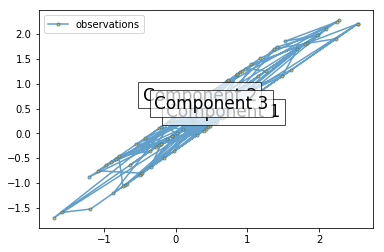

array([[-0.2812984 , -0.2812984 ],
       [ 0.72899615,  0.39566281],
       [ 0.78578819,  0.78578819],
       [-0.97020715, -0.63687382],
       [-0.05407965, -0.05407965],
       [ 0.89456568,  1.22789901],
       [ 0.54503937,  0.54503937],
       [ 0.3395427 ,  0.3395427 ],
       [-0.02406231, -0.35739564],
       [ 1.83043527,  1.83043527],
       [ 0.97271102,  1.30604435],
       [ 1.25802359,  1.25802359],
       [-0.68141157, -1.0147449 ],
       [ 0.29613894, -0.03719439],
       [-0.0565654 , -0.0565654 ],
       [ 1.06411042,  0.73077708],
       [-0.84144919, -0.50811586],
       [ 0.45409325,  0.12075992],
       [ 0.23798753,  0.23798753],
       [ 0.36695916,  0.36695916],
       [ 0.71967495,  1.05300828],
       [-0.43188542, -0.09855208],
       [ 1.60603521,  1.27270187],
       [ 1.10077873,  0.76744539],
       [ 2.54729408,  2.21396075],
       [-1.70598495, -1.70598495],
       [ 0.72362594,  1.05695927],
       [ 0.6960046 ,  1.02933793],
       [-0.16244101,

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

##############################################################
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([1./3, 1./3, 1./3])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[1./3, 1./3, 1./3], [1./3, 1./3, 1./3], [1./3, 1./3, 1./3]])
# The means of each component
means = np.array([[4./6, 2./6], [2./6, 4./6], [3./6, 3./6]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
###############################################################

# Generate samples
X, Z = model.sample(100)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()
X

**5. Assuming that the following is a part of subpixel convolution networks with stride 12. Compute the resultant values with the ReLU activation function.**
![](https://github.com/wei840222/ML-HW/blob/master/images/HW6Q4.jpg?raw=true)